In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

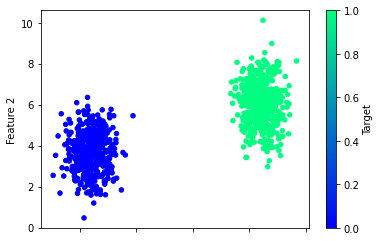

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 486us/step - loss: 0.4578 - accuracy: 0.9747
Epoch 2/100
24/24 [==============================] - 0s 454us/step - loss: 0.4462 - accuracy: 0.9960
Epoch 3/100
24/24 [==============================] - 0s 446us/step - loss: 0.4347 - accuracy: 0.9960
Epoch 4/100
24/24 [==============================] - 0s 518us/step - loss: 0.4236 - accuracy: 0.9960
Epoch 5/100
24/24 [==============================] - 0s 543us/step - loss: 0.4127 - accuracy: 0.9973
Epoch 6/100
24/24 [==============================] - 0s 565us/step - loss: 0.4022 - accuracy: 0.9960
Epoch 7/100
24/24 [==============================] - 0s 588us/step - loss: 0.3920 - accuracy: 0.9973
Epoch 8/100
24/24 [==============================] - 0s 606us/step - loss: 0.3821 - accuracy: 0.9973
Epoch 9/100
24/24 [==============================] - 0s 759us/step - loss: 0.3726 - accuracy: 0.9973
Epoch 10/100
24/24 [==============================] - 0s 632us/step - loss: 0.3633 - accura

24/24 [==============================] - 0s 433us/step - loss: 0.0943 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 497us/step - loss: 0.0929 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 493us/step - loss: 0.0915 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 523us/step - loss: 0.0901 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 452us/step - loss: 0.0887 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 436us/step - loss: 0.0874 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 475us/step - loss: 0.0861 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 486us/step - loss: 0.0848 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 463us/step - loss: 0.0836 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 426us/step - loss: 0.0824 - accuracy: 

<AxesSubplot:>

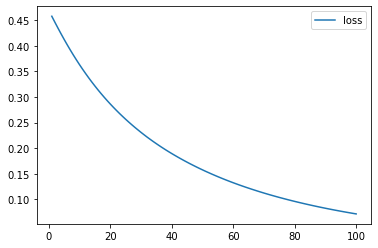

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

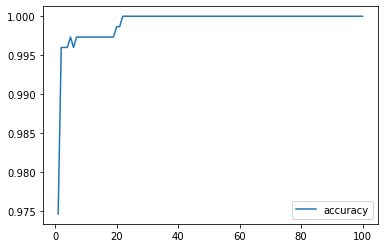

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0734 - accuracy: 1.0000 - 76ms/epoch - 9ms/step
Loss: 0.07339537143707275, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

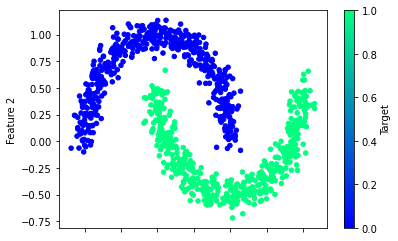

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 705us/step - loss: 1.2027 - accuracy: 0.4613
Epoch 2/100
24/24 [==============================] - 0s 665us/step - loss: 1.0655 - accuracy: 0.4840
Epoch 3/100
24/24 [==============================] - 0s 668us/step - loss: 0.9761 - accuracy: 0.4987
Epoch 4/100
24/24 [==============================] - 0s 690us/step - loss: 0.9160 - accuracy: 0.5093
Epoch 5/100
24/24 [==============================] - 0s 717us/step - loss: 0.8708 - accuracy: 0.5213
Epoch 6/100
24/24 [==============================] - 0s 759us/step - loss: 0.8360 - accuracy: 0.5320
Epoch 7/100
24/24 [==============================] - 0s 765us/step - loss: 0.8076 - accuracy: 0.5440
Epoch 8/100
24/24 [==============================] - 0s 705us/step - loss: 0.7837 - accuracy: 0.5640
Epoch 9/100
24/24 [==============================] - 0s 694us/step - loss: 0.7634 - accuracy: 0.5720
Epoch 10/100
24/24 [==============================] - 0s 703us/step - loss: 0.7455 - accura

24/24 [==============================] - 0s 719us/step - loss: 0.3548 - accuracy: 0.8360
Epoch 82/100
24/24 [==============================] - 0s 661us/step - loss: 0.3508 - accuracy: 0.8453
Epoch 83/100
24/24 [==============================] - 0s 703us/step - loss: 0.3469 - accuracy: 0.8467
Epoch 84/100
24/24 [==============================] - 0s 702us/step - loss: 0.3432 - accuracy: 0.8493
Epoch 85/100
24/24 [==============================] - 0s 659us/step - loss: 0.3394 - accuracy: 0.8533
Epoch 86/100
24/24 [==============================] - 0s 749us/step - loss: 0.3359 - accuracy: 0.8560
Epoch 87/100
24/24 [==============================] - 0s 697us/step - loss: 0.3324 - accuracy: 0.8573
Epoch 88/100
24/24 [==============================] - 0s 669us/step - loss: 0.3291 - accuracy: 0.8587
Epoch 89/100
24/24 [==============================] - 0s 705us/step - loss: 0.3258 - accuracy: 0.8600
Epoch 90/100
24/24 [==============================] - 0s 693us/step - loss: 0.3228 - accuracy: 

<AxesSubplot:>

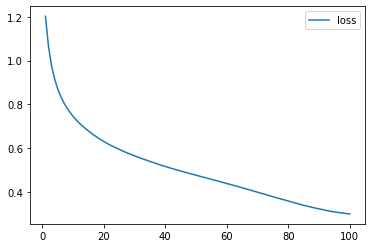

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

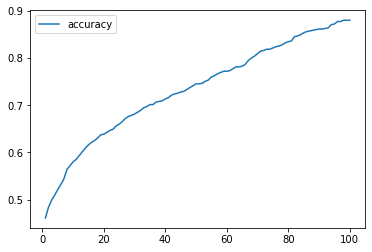

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 578us/step - loss: 0.5630 - accuracy: 0.7413
Epoch 2/100
24/24 [==============================] - 0s 567us/step - loss: 0.5401 - accuracy: 0.7587
Epoch 3/100
24/24 [==============================] - 0s 509us/step - loss: 0.5170 - accuracy: 0.7747
Epoch 4/100
24/24 [==============================] - 0s 531us/step - loss: 0.4945 - accuracy: 0.7827
Epoch 5/100
24/24 [==============================] - 0s 550us/step - loss: 0.4727 - accuracy: 0.8000
Epoch 6/100
24/24 [==============================] - 0s 601us/step - loss: 0.4514 - accuracy: 0.8173
Epoch 7/100
24/24 [==============================] - 0s 582us/step - loss: 0.4317 - accuracy: 0.8200
Epoch 8/100
24/24 [==============================] - 0s 552us/step - loss: 0.4127 - accuracy: 0.8267
Epoch 9/100
24/24 [==============================] - 0s 554us/step - loss: 0.3954 - accuracy: 0.8360
Epoch 10/100
24/24 [==============================] - 0s 544us/step - loss: 0.3796 - accura

Epoch 81/100
24/24 [==============================] - 0s 522us/step - loss: 0.1501 - accuracy: 0.9453
Epoch 82/100
24/24 [==============================] - 0s 539us/step - loss: 0.1482 - accuracy: 0.9467
Epoch 83/100
24/24 [==============================] - 0s 519us/step - loss: 0.1463 - accuracy: 0.9493
Epoch 84/100
24/24 [==============================] - 0s 526us/step - loss: 0.1444 - accuracy: 0.9493
Epoch 85/100
24/24 [==============================] - 0s 595us/step - loss: 0.1425 - accuracy: 0.9493
Epoch 86/100
24/24 [==============================] - 0s 554us/step - loss: 0.1407 - accuracy: 0.9507
Epoch 87/100
24/24 [==============================] - 0s 525us/step - loss: 0.1391 - accuracy: 0.9507
Epoch 88/100
24/24 [==============================] - 0s 504us/step - loss: 0.1371 - accuracy: 0.9507
Epoch 89/100
24/24 [==============================] - 0s 522us/step - loss: 0.1353 - accuracy: 0.9520
Epoch 90/100
24/24 [==============================] - 0s 542us/step - loss: 0.1336